# Mincurso Python Científico
## Lista 02 - Solução
## Andre Nepomuceno - UFF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import pandas as pd
%matplotlib inline

**Questão 2.1**

In [2]:
#importar tabelas da web
url = 'https://en.wikipedia.org/wiki/Abundances_of_the_elements_(data_page)'
data_web = pd.read_html(url,header=0)

In [3]:
data_web[3].head(7)

,Element,S1,Y1,Y2
0,01 H hydrogen,2.8×104,2.8×104*,2.79×104
1,02 He helium,2.7×103,2.7×103*,2.72×103
2,03 Li lithium,4.0×10−7,5.7×10−5,5.71×10−5 (9.2%)
3,04 Be beryllium,4.0×10−7,7.0×10−7,7.30×10−7 (9.5%)
4,05 B boron,1.1×10−5,2.1×10−5,2.12×10−5 (10%)
5,06 C carbon,1.0×101,1.0×101*,1.01×101
6,07 N nitrogen,3.1×100,3.1×100*,3.13×100


In [4]:
#Vamos criar um array de 1 a 94 para servir como indices do DataFrame e numero atomico Z
data_web[3].set_index(np.arange(1,95),inplace=True)
data_web[3].head()

,Element,S1,Y1,Y2
1,01 H hydrogen,2.8×104,2.8×104*,2.79×104
2,02 He helium,2.7×103,2.7×103*,2.72×103
3,03 Li lithium,4.0×10−7,5.7×10−5,5.71×10−5 (9.2%)
4,04 Be beryllium,4.0×10−7,7.0×10−7,7.30×10−7 (9.5%)
5,05 B boron,1.1×10−5,2.1×10−5,2.12×10−5 (10%)


In [5]:
data_solar = data_web[3].copy()
data_solar.drop(['S1','Y2'],axis=1,inplace=True)
data_solar.head(6)

,Element,Y1
1,01 H hydrogen,2.8×104*
2,02 He helium,2.7×103*
3,03 Li lithium,5.7×10−5
4,04 Be beryllium,7.0×10−7
5,05 B boron,2.1×10−5
6,06 C carbon,1.0×101*


In [6]:
data_solar.dropna(inplace=True)

A coluna Y1 é formada por strings que não podem ser diretamente convertidos para floats. Primeiro teremos que utilizar os métodos de strings para separar a mantissa dos expoentes. Vamos usar o metodo replace e slicing de strings. 
1. Primeiro, eliminamos o caractere "*" presente nos valores
2. Depois de eliminar *, os numeros com potencia de dez negativos vão ter 8 caracteres, e positivos 7
3. Utilizamos slicing para formar o numero e tranforma-lo para float

In [7]:
#Para ficar mais claro, vejamos um exemplo
st1 = data_solar.iloc[:,1].values[1]
st1

'2.7×103*'

In [8]:
st2 = st1.replace("*","")
st2

'2.7×103'

In [9]:
len(st2)

7

In [10]:
float(st2[:3]+'e'+st2[-1])

2700.0

In [11]:
#Agora vamos aplicar o metodo a todos os valores de Y1
abundancia = data_solar.iloc[:,1].values
abundancia[:10]

array(['2.8×104*', '2.7×103*', '5.7×10−5', '7.0×10−7', '2.1×10−5',
       '1.0×101*', '3.1×100*', '2.4×101*', '8.5×10−4', '3.0×100*'],
      dtype=object)

In [12]:
abund = np.empty(abundancia.size)
for j in range(abundancia.size):
    s1 = abundancia[j].replace("*","")
    if len(s1) == 7:
        abund[j] = float(s1[:3]+'e'+s1[-1])
    else:
        abund[j] = float(s1[:3]+'e-'+s1[-1])
abund[:10]

array([2.8e+04, 2.7e+03, 5.7e-05, 7.0e-07, 2.1e-05, 1.0e+01, 3.1e+00,
       2.4e+01, 8.5e-04, 3.0e+00])

Text(82, -5, 'Pb')

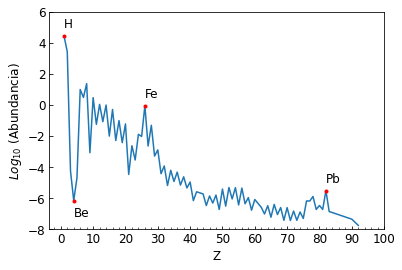

In [13]:
#Plotar o grafico. O eixo y sera log10 da abundancia
#Vamos identificar alguns elementos no gráfico usando ax.text
fig, ax1 = plt.subplots()
z = list(data_solar.index)
ax1.plot(z,np.log10(abund),lw=1.5)
idz = [0,3,25,79]
ax1.plot([1,4,26,82],np.log10(abund[idz]),'.r')
ax1.set_xticks(np.arange(0,110,10))
ax1.minorticks_on()
ax1.tick_params(direction='in',labelsize=12)
ax1.tick_params(axis='x', which='minor',direction='in')
ax1.tick_params(axis='y', which='minor',left=False)
ax1.set_ylim(-8,6)
ax1.set_xlabel('Z',fontsize=12)
ax1.set_ylabel('$Log_{10}$ (Abundancia)',fontsize=12)
ax1.text(1,5,'H',fontsize=12)
ax1.text(4,-7.2,'Be',fontsize=12)
ax1.text(26,0.5,'Fe',fontsize=12)
ax1.text(82,-5,'Pb',fontsize=12)

**Questão 2.2**

In [14]:
#importar o arquivo
data_star = pd.read_csv('../pcientifico_dados/hygdata_v3-file.csv',delimiter=',')
data_star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12504 entries, 0 to 12503
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12504 non-null  int64  
 1   id            12504 non-null  int64  
 2   hip           11106 non-null  float64
 3   hd            9163 non-null   float64
 4   hr            865 non-null    float64
 5   gl            1867 non-null   object 
 6   bf            301 non-null    object 
 7   proper        24 non-null     object 
 8   ra            12504 non-null  float64
 9   dec           12504 non-null  float64
 10  dist          12504 non-null  float64
 11  pmra          12504 non-null  float64
 12  pmdec         12504 non-null  float64
 13  rv            12504 non-null  float64
 14  mag           12504 non-null  float64
 15  absmag        12504 non-null  float64
 16  spect         12083 non-null  object 
 17  ci            11775 non-null  float64
 18  x             12504 non-nu

In [15]:
data_star.head()

,Unnamed: 0,id,hip,hd,hr,gl,bf,proper,ra,dec,...,flam,con,comp,comp_primary,base,lum,var,var_min,var_max,T
0,76189,76189,76423.0,139216.0,NaN,NaN,NaN,NaN,15.607830,15.101424,...,17.0,Ser,1,76189,NaN,91.790979,Tau-4,6.760,6.410,4308.727009
1,107312,107312,107655.0,207372.0,NaN,NaN,NaN,NaN,21.806345,0.200786,...,NaN,Aqr,1,107312,NaN,14.736692,NaN,NaN,NaN,5039.699311
2,62985,62985,63187.0,NaN,NaN,NaN,NaN,NaN,12.945114,-50.182346,...,NaN,Cen,1,62985,NaN,2.412126,NaN,10.437,10.287,5426.533872
3,114671,114671,115032.0,219713.0,NaN,NaN,NaN,NaN,23.298389,18.702398,...,NaN,Peg,1,114671,NaN,23.507151,NaN,NaN,NaN,4565.156303
4,51601,51601,51750.0,91426.0,NaN,NaN,NaN,NaN,10.572482,49.107306,...,NaN,UMa,1,51601,NaN,173.300574,NaN,NaN,NaN,3870.295640


In [16]:
#Vamos criar um dataset apenas com as colunas 'lum' e 'ci'
data_HR = data_star.iloc[:,[17,34]].copy()
data_HR.head(7)

,ci,lum
0,1.200,91.790979
1,0.884,14.736692
2,0.753,2.412126
3,1.077,23.507151
4,1.450,173.300574
5,0.664,1.818026
6,0.059,111.892248


In [17]:
#Limpar o dataset
data_HR.dropna(inplace=True)

In [18]:
#Incluir uma coluna T no dataset
data_HR['T'] = 4600*( 1/(0.92*data_HR['ci']+1.7) + 1/(0.92*data_HR['ci']+0.62) ) 
data_HR.head()

,ci,lum,T
0,1.200,91.790979,4308.727009
1,0.884,14.736692,5039.699311
2,0.753,2.412126,5426.533872
3,1.077,23.507151,4565.156303
4,1.450,173.300574,3870.295640


Text(0.5, 1.0, 'Diagrama de Hertzsprung–Russell')

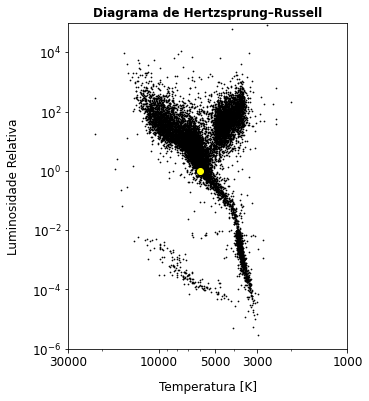

In [19]:
fig,ax2 = plt.subplots(figsize=(5,6))
ax2.scatter(data_HR.iloc[:,2].values,data_HR.iloc[:,1].values,s=0.5,c='k')
ax2.plot(6000,1,marker='o',c='yellow') #SOL
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(1000,30000)
ax2.set_ylim(1e-6,1e5)
ax2.set_xticks([1000,3000,5000,10000,30000])
ax2.get_xaxis().set_major_formatter(ScalarFormatter())
ax2.invert_xaxis()
ax2.tick_params(labelsize=12)
ax2.set_xlabel('Temperatura [K]',fontsize=12,labelpad=12)
ax2.set_ylabel('Luminosidade Relativa',fontsize=12,labelpad=12)
ax2.set_title('Diagrama de Hertzsprung–Russell',fontsize=12,fontweight='bold')

**Questão 2.3**

1. Vamos importar o arquivo weather-raw.csv, disponível no site indicado.
2. O arquivo weather-raw-format.txt contem a descrição das colunas. Usaremos essas informações para nomear as colunas. Veja as unidades de cada medida no arquivo
3. Vamos usar o opção do pandas parse_dates=True para que a primeira coluna, que será os indices, seja interpretada como data/hora (DataTimeIndex)

In [20]:
data_weather = pd.read_csv('../pcientifico_dados/weather-raw.csv',delimiter=',',index_col=0,
                           names = ['Temperatura','Humidade','Ponto Orvalho','Pressao',
                                    'Vel. Vento','Direcao Vento',
                                    'Periodo Luminoso','Chuva','Max.Vel.Vento'],parse_dates=True)
data_weather.head()

,Temperatura,Humidade,Ponto Orvalho,Pressao,Vel. Vento,Direcao Vento,Periodo Luminoso,Chuva,Max.Vel.Vento
1995-06-30 15:00:00,295.0,43.0,156.0,1013.0,14.0,225.0,1044,0,14.0
1995-06-30 15:30:00,305.0,36.0,140.0,1013.0,13.0,315.0,50,0,13.0
1995-06-30 16:00:00,311.0,41.0,163.0,1013.0,12.0,315.0,51,0,12.0
1995-06-30 16:30:00,322.0,43.0,181.0,1013.0,2.0,315.0,50,0,2.0
1995-06-30 17:00:00,327.0,41.0,178.0,1013.0,8.0,225.0,51,0,8.0


In [21]:
#a) direção do vento mais frequente
#Primeiro, vamos usar o método value_counts(). Esse método retorna quantas vezes um determinado
#valor aparece numa columa:
data_weather['Direcao Vento'].value_counts()

180.0    98544
225.0    93935
270.0    59269
135.0    57627
315.0    55569
45.0     41708
90.0     18783
0.0      14715
157.0       29
22.0        19
202.0       18
247.0       15
67.0        14
292.0       13
112.0        9
Name: Direcao Vento, dtype: int64

In [22]:
#Para determinar a o valor mais ferquente basta usar agora o método idxmax(). Note que na tabela acima,
#ja podemos ver que a direção mais frequente é 180 graus
direc = data_weather['Direcao Vento'].value_counts().idxmax()
print(f'Direção do vento mais frequênte: {direc} graus')

Direção do vento mais frequênte: 180.0 graus


In [23]:
#b) maior velocidade do vento medida
vento_max = data_weather['Max.Vel.Vento'].max()
print(f'Velocidade Máxima do Vento: {vento_max} (nós x10)')

Velocidade Máxima do Vento: 2550.0 (nós x10)


In [24]:
#c) Ano com mes junho mais ensolarado
#O indices desse DataFrame são objetos DataTimeIndex, que tem abributo 'month'. Vamos utiliza-lo para fazer um 
#filtro e obter os dados apenas do mes de junho de todos os anos
idm = data_weather.index.month == 6
data_junho = data_weather.loc[idm]
#data_junho[:5000:500]
data_junho.tail()

,Temperatura,Humidade,Ponto Orvalho,Pressao,Vel. Vento,Direcao Vento,Periodo Luminoso,Chuva,Max.Vel.Vento
2021-06-30 21:30:00,118.0,85.0,93.0,1019.0,0.0,315.0,0,0,0.0
2021-06-30 22:00:00,114.0,80.0,81.0,1019.0,0.0,315.0,0,0,0.0
2021-06-30 22:30:00,109.0,100.0,109.0,1019.0,0.0,315.0,0,0,0.0
2021-06-30 23:00:00,109.0,97.0,104.0,1019.0,0.0,315.0,0,0,0.0
2021-06-30 23:30:00,105.0,82.0,75.0,1019.0,0.0,315.0,0,0,0.0


In [25]:
#Agora vamos usar o método resamble('A'), para agrupar os dados por ano (por isso a opção 'A')
#Usamos sum() para somar a luminosidade de todo o mes de junho, de cada ano
#Note que embora o indice termine em 12-31, apenas os meses de junho estao sendo considerado
data_junho_anos = data_junho.resample('A')
data_junho_anos['Periodo Luminoso'].sum()

1995-12-31     1472
1996-12-31    18447
1997-12-31    11006
1998-12-31     6476
1999-12-31    17970
2000-12-31    14728
2001-12-31    17070
2002-12-31    11980
2003-12-31    18330
2004-12-31    18200
2005-12-31    19150
2006-12-31    23680
2007-12-31    11495
2008-12-31    17000
2009-12-31    13745
2010-12-31    19547
2011-12-31    15561
2012-12-31     9539
2013-12-31    13694
2014-12-31    16320
2015-12-31    16393
2016-12-31    12924
2017-12-31    16613
2018-12-31    17350
2019-12-31    12550
2020-12-31    18501
2021-12-31    14807
Freq: A-DEC, Name: Periodo Luminoso, dtype: int64

In [26]:
#Usamos idxmax para encontrar o ano com com maxima luminosidade
ano = data_junho_anos['Periodo Luminoso'].sum().idxmax().year
print(f'Ano com mês de junho mais ensolarado: {ano}')

Ano com mês de junho mais ensolarado: 2006


In [27]:
#d) o dia mais chuvoso
#Vamos usar novamente resamble, mas agora com a opção 'D' (dia)
data_dia = data_junho_anos = data_junho.resample('D')
data_dia['Chuva'].sum()

1995-06-30       0
1995-07-01       0
1995-07-02       0
1995-07-03       0
1995-07-04       0
              ... 
2021-06-26     120
2021-06-27    2500
2021-06-28    1070
2021-06-29     140
2021-06-30     470
Freq: D, Name: Chuva, Length: 9498, dtype: int64

In [28]:
#Dia mais chuvoso de todo o dataset
dia = data_dia['Chuva'].sum().idxmax()
print(f'{dia}')

2019-06-01 00:00:00


In [29]:
#e) menor temperatura
menor_temp = data_weather['Temperatura'].min()/10.
print(f'Menor Temperatura: {menor_temp} C')

Menor Temperatura: -40.0 C


**Questão 2.4**

In [30]:
#importar os dados
data_cov = pd.read_csv('../pcientifico_dados/time_series_covid19_confirmed_global.csv',header=0)
data_cov.head(6)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,153534,153626,153736,153840,153962,153982,153990,154094,154180,154283
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,151499,152239,153318,154316,155293,156162,157026,157436,158431,159423
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,198313,198645,198962,199275,199560,199822,200068,200301,200528,200770
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15069,15070,15070,15078,15083,15083,15083,15096,15099,15108
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,48790,49114,49349,49628,49943,50348,50446,50738,51047,51407
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,1878,1960,1974,2059,2059,2166,2166,2297,2304,2304


In [31]:
#vamos descartar as colunas que não temos interesse
data_cov = data_cov.drop(['Province/State','Lat','Long'],axis=1)

In [32]:
#Estamos interessados nos dados de 2021. Vamos descartar todos os dados de 2020
#Primeiro, vamos verificar se a seleção está correta, usando slicing
data_cov.loc[:,'1/22/20':'12/31/20'].head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20
0,0,0,0,0,0,0,0,0,0,0,...,50888,51070,51357,51595,51764,51848,52007,52147,52330,52330
1,0,0,0,0,0,0,0,0,0,0,...,53814,54317,54827,55380,55755,56254,56572,57146,57727,58316
2,0,0,0,0,0,0,0,0,0,0,...,96069,96549,97007,97441,97857,98249,98631,98988,99311,99610
3,0,0,0,0,0,0,0,0,0,0,...,7633,7669,7699,7756,7806,7821,7875,7919,7983,8049
4,0,0,0,0,0,0,0,0,0,0,...,16802,16931,17029,17099,17149,17240,17296,17371,17433,17553


In [33]:
#descartamos todas as colunas com dados de 2020, mas 
#manteremos o dia 12/31/2020
data_cov2 = data_cov.drop(data_cov.loc[:,'1/22/20':'12/30/20'],axis=1)
data_cov2.head()

,Country/Region,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,...,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21
0,Afghanistan,52330,52513,52586,52709,52909,53011,53105,53207,53332,...,153534,153626,153736,153840,153962,153982,153990,154094,154180,154283
1,Albania,58316,58316,58991,59438,59623,60283,61008,61705,62378,...,151499,152239,153318,154316,155293,156162,157026,157436,158431,159423
2,Algeria,99610,99897,100159,100408,100645,100873,101120,101382,101657,...,198313,198645,198962,199275,199560,199822,200068,200301,200528,200770
3,Andorra,8049,8117,8166,8192,8249,8308,8348,8348,8489,...,15069,15070,15070,15078,15083,15083,15083,15096,15099,15108
4,Angola,17553,17568,17608,17642,17684,17756,17864,17974,18066,...,48790,49114,49349,49628,49943,50348,50446,50738,51047,51407


In [34]:
#Vamos utilizar os paises como indices (Index) do DataFrame
data_cov2.set_index('Country/Region',inplace=True)

In [35]:
#Como cada coluna dá o acumulado de casos, vamos tomar a diferença entre as colunas,
#metodo diff(), para saber o numero de casos diarios no Brasil
data_BR = data_cov2.loc['Brazil'].diff()
data_BR

12/31/20        NaN
1/1/21      24605.0
1/2/21      15827.0
1/3/21      17341.0
1/4/21      20006.0
             ...   
9/11/21     14314.0
9/12/21     10615.0
9/13/21      6645.0
9/14/21     13406.0
9/15/21     14780.0
Name: Brazil, Length: 259, dtype: float64

In [36]:
#retirar 12/31/20
data_BR.dropna(inplace=True)

In [37]:
#Vamos calcular a media dos casos a cada 7 dias e criar duas listas: uma com a media e outro com 
#o ultimo dia da media, para formar o par (data_media,media)
media = []
datas_media = []
nsteps = int(data_BR.size/7)*7
for i in range(0,nsteps,7):
    media.append( data_BR.iloc[i:i+7].mean())
    datas_media.append( data_BR.iloc[i:i+7].index[6])
print(datas_media[0])
print(datas_media[35])

1/7/21
9/9/21


In [38]:
#converter casos diarios e dias para arrays
datas = np.array(data_BR.index)
casos = data_BR.values

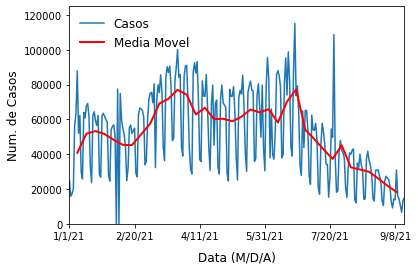

In [39]:
#vamos plotar os casos diarios e media movel
fig = plt.figure()
ax3 = fig.add_subplot()
ax3.plot(datas,casos,label='Casos')
ax3.plot(datas_media,media,c='r',lw=2,label='Media Movel')
ax3.xaxis.set_major_locator(plt.MaxNLocator(6))
ax3.set_xlim('1/1/21','9/15/21')
ax3.set_ylim(0,125000)
ax3.set_xlabel('Data (M/D/A)',fontsize=12,labelpad=10)
ax3.set_ylabel('Num. de Casos',fontsize=12)
ax3.legend(frameon=False,fontsize=12,loc='upper left')

**Questão 2.5**  \\\
Veja solução da Lista 01

**Questão 2.6**  

In [40]:
#importar o arquivo sunspot_data.csv

In [41]:
data_spot = pd.read_csv('../pcientifico_dados/sunspot_data.csv',delimiter=',',index_col=0)
data_spot.head(6)

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1
5,1818,1,6,1818.015,-1,-1.0,0,1


In [42]:
#Neste dataset, o valor '-1' no 'Number of Sunspots' indica que não temos dados deste dia. 
#Para não interferir na contagem, vamos subsbituir '-1' por '0'
data_spot.replace(to_replace=-1, value=0,inplace=True)
data_spot.head(10)

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,1818,1,1,1818.001,0,0.0,0,1
1,1818,1,2,1818.004,0,0.0,0,1
2,1818,1,3,1818.007,0,0.0,0,1
3,1818,1,4,1818.010,0,0.0,0,1
4,1818,1,5,1818.012,0,0.0,0,1
5,1818,1,6,1818.015,0,0.0,0,1
6,1818,1,7,1818.018,0,0.0,0,1
7,1818,1,8,1818.021,65,10.2,1,1
8,1818,1,9,1818.023,0,0.0,0,1
9,1818,1,10,1818.026,0,0.0,0,1


In [43]:
#Vamos selecionar um dataset com dados a partir de 1985 
data_sub = data_spot.loc[data_spot['Year'] > 1984]
data_sub

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
60996,1985,1,1,1985.001,0,2.0,13,1
60997,1985,1,2,1985.004,0,2.0,14,1
60998,1985,1,3,1985.007,0,2.0,13,1
60999,1985,1,4,1985.010,0,2.0,16,1
61000,1985,1,5,1985.012,0,2.0,16,1
...,...,...,...,...,...,...,...,...
73713,2019,10,27,2019.821,0,0.0,34,0
73714,2019,10,28,2019.823,0,0.0,34,0
73715,2019,10,29,2019.826,0,0.0,30,0
73716,2019,10,30,2019.829,0,0.0,24,0


In [44]:
#Vamos utilizar MultiIndex, com anos como indices externos e mês como indices internos
data_sub.set_index(['Year','Month'],inplace=True)
data_sub

Day  Date In Fraction Of Year  Number of Sunspots  \
Year Month                                                      
1985 1        1                  1985.001                   0   
     1        2                  1985.004                   0   
     1        3                  1985.007                   0   
     1        4                  1985.010                   0   
     1        5                  1985.012                   0   
...         ...                       ...                 ...   
2019 10      27                  2019.821                   0   
     10      28                  2019.823                   0   
     10      29                  2019.826                   0   
     10      30                  2019.829                   0   
     10      31                  2019.832                   0   

            Standard Deviation  Observations  Indicator  
Year Month                                               
1985 1                     2.0            13          1  
     1                     2.0            14          1  
     1                     2.0            13          1  
     1                     2.0            16          1  
     1                     2.0            16          1  
...                        ...           ...        ...  
2019 10                    0.0            34          0  
     10                    0.0            34          0  
     10                    0.0            30          0  
     10                    0.0            24          0  
     10                    0.0            28          0  

[12722 rows x 6 columns]

In [45]:
#Agora vamos usar o método groupby para agrupar os dados de Sunspots por mês, em cada ano
#Vamos usar o método groupby('Month').sum(), em cada ANO. Depois vamos
#obter uam lista para cada ano, e juntá-las.
lista_soma = []
for k in range(1985,2020):
    lista_soma += list(data_sub.loc[k]['Number of Sunspots'].groupby('Month').sum())
lista_soma[:15]

[553, 580, 523, 611, 1005, 849, 1238, 314, 130, 681, 536, 491, 86, 781, 429]

In [46]:
print(len(lista_soma))

418


In [47]:
#função gaussiana simples para servir de Toy Model
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

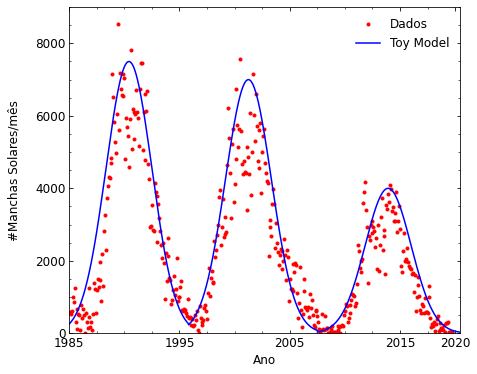

In [48]:
#Plotar o gráfico de dados. Vamos plotar também o Toy Model
fig,ax4 = plt.subplots(figsize=(7,6))
tempo = np.arange(0,418)
ax4.plot(tempo,lista_soma,'.r',label='Dados')
ax4.set_xlim(0,425)
ax4.set_ylim(-1.,9000)
x1 = np.linspace(0,130,400)
x2 = np.linspace(130,270,400)
x3 = np.linspace(270,450,400)
ax4.plot(x1,7500*gaussian(x1,65,25),c='b',label='Toy Model')
ax4.plot(x2,7000*gaussian(x2,195,25),c='b')
ax4.plot(x3,4000*gaussian(x3,347,25),c='b')
ax4.set_xticks([0,120,240,360,420])
ax4.set_xticklabels([1985,1995,2005,2015,2020])
ax4.minorticks_on()
ax4.tick_params(direction='in',labelsize=12,right=True,top=True)
ax4.tick_params(axis='both', which='minor',direction='in',right=True,top=True)
ax4.set_xlabel('Ano',fontsize=12)
ax4.set_ylabel('#Manchas Solares/mês',fontsize=12,labelpad=15)
ax4.legend(frameon=False,fontsize=12)